# Rossman Sales Data Prediction
The data in train.csv contains a total of 9 columns of information.
- store: is the id number of the corresponding store
- DayOfWeek: represents the number of days per week that the store is open
- Data: is the date when the corresponding sales were generated
- Sales: is the historical data of sales
- Customers: is the number of customers who came into the store
- Open: indicates whether the store is open or not
- Promo: indicates whether the store has a promotion on that day
- StateHoliday: and SchoolHoliday indicate whether it is a national holiday or a school holiday, respectively.

The data in store.csv:
- Store: corresponds to the number of the store.
- StoreType: the type of store, there are a, b, c, d four different types of stores. You can imagine it as a flash store, general business store, flagship store, or mini store, which is the type of our life.
- Assortment: a, b, and c are used to describe the level of combination of products sold in the store. For example, there must be a big difference between the products in the flagship store and the mini store.
- Competition Distance, Competition Open Since Year, Competition Open Since Month: indicate the distance of the nearest competitor's store, the opening time (in years), and the opening time (in months), respectively.
- Promo2: Describes whether the store has a long-term promotion.
- Promo2 Since Year in Promo2 Since Week: Indicates the year and calendar week, respectively, when the store started participating in the promotion.
- Promo Interval: Describes the continuous interval from promo2, named after the month in which the promotion restarted.


## Packages import and Data Loading

In [ ]:
!pip install skimpy
!pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import datetime
import math
import calendar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_PATH = '/content/drive/MyDrive/ML/input/rossmann_store_sales/train.csv'
TEST_PATH = '/content/drive/MyDrive/ML/input/rossmann_store_sales/test.csv'
STORE_PATH = '/content/drive/MyDrive/ML/input/rossmann_store_sales/store.csv'
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
store = pd.read_csv(STORE_PATH)

train.shape, test.shape, store.shape

((1017209, 9), (41088, 8), (1115, 10))

## EDA

In [ ]:
skimpy.skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1017209 │ │ int64       │ 7     │                                                         │
│ │ Number of columns │ 8       │ │ string      │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0  ┃ p25    ┃ p50    ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Store             │    0 │      0 │    558.4 │    321.9 │   1 │    280 │    558 │   838 │   1115 │ ▇▇▇▇▇▇  │  │
│ │ DayOfWeek         │    0 │      0 │    3.998 │    1.997 │   1 │      2 │      4 │     6 │      7 │ ▃▅▅▅▅▇  │  │
│ │ Sales             │    0 │      0 │     5774 │     3850 │   0 │   3727 │   5744 │  7856 │  41550 │   ▇▃    │  │
│ │ Customers         │    0 │      0 │    633.1 │    464.4 │   0 │    405 │    609 │   837 │   7388 │   ▇▁    │  │
│ │ Open              │    0 │      0 │   0.8301 │   0.3755 │   0 │      1 │      1 │     1 │      1 │ ▂    ▇  │  │
│ │ Promo             │    0 │      0 │   0.3815 │   0.4858 │   0 │      0 │      0 │     1 │      1 │ ▇    ▅  │  │
│ │ SchoolHoliday     │    0 │      0 │   0.1786 │   0.3831 │   0 │      0 │      0 │     0 │      1 │ ▇    ▂  │  │
│ └───────────────────┴──────┴────────┴──────────┴──────────┴─────┴────────┴────────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                      │       0 │          0 │                            1 │                  1017209 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
skimpy.skim(test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 41088  │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Id                │   0 │      0 │    20540 │    11860 │   1 │  10270 │  20540 │  30820 │  41090 │ ▇▇▇▇▇▇  │  │
│ │ Store             │   0 │      0 │    555.9 │    320.3 │   1 │  279.8 │  553.5 │  832.2 │   1115 │ ▇▇▇▇▇▇  │  │
│ │ DayOfWeek         │   0 │      0 │    3.979 │    2.015 │   1 │      2 │      4 │      6 │      7 │ ▃▃▃▃▃▇  │  │
│ │ Open              │  11 │   0.03 │   0.8543 │   0.3528 │   0 │      1 │      1 │      1 │      1 │ ▁    ▇  │  │
│ │ Promo             │   0 │      0 │   0.3958 │    0.489 │   0 │      0 │      0 │      1 │      1 │ ▇    ▅  │  │
│ │ SchoolHoliday     │   0 │      0 │   0.4435 │   0.4968 │   0 │      0 │      0 │      1 │      1 │ ▇    ▆  │  │
│ └───────────────────┴─────┴────────┴──────────┴──────────┴─────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                       │      0 │          0 │                            1 │                    41088 │  │
│ │ StateHoliday               │      0 │          0 │                            1 │                    41088 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
skimpy.skim(store)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1115   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50  ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Store                  │    0 │      0 │     558 │     322 │     1 │ 279.5 │  558 │ 836.5 │  1115 │ ▇▇▇▇▇▇ │  │
│ │ CompetitionDistance    │    3 │   0.27 │    5405 │    7663 │    20 │ 717.5 │ 2325 │  6882 │ 75860 │   ▇▁   │  │
│ │ CompetitionOpenSinceMo │  354 │  31.75 │   7.225 │   3.212 │     1 │     4 │    8 │    10 │    12 │ ▂▇▅▅▇▇ │  │
│ │ nth                    │      │        │         │         │       │       │      │       │       │        │  │
│ │ CompetitionOpenSinceYe │  354 │  31.75 │    2009 │   6.196 │  1900 │  2006 │ 2010 │  2013 │  2015 │      ▇ │  │
│ │ ar                     │      │        │         │         │       │       │      │       │       │        │  │
│ │ Promo2                 │    0 │      0 │  0.5121 │  0.5001 │     0 │     0 │    1 │     1 │     1 │ ▇    ▇ │  │
│ │ Promo2SinceWeek        │  544 │  48.79 │    23.6 │   14.14 │     1 │    13 │   22 │    37 │    50 │ ▅▇▃▃▇▂ │  │
│ │ Promo2SinceYear        │  544 │  48.79 │    2012 │   1.675 │  2009 │  2011 │ 2012 │  2013 │  2015 │ ▅▃▇▅▇▇ │  │
│ └────────────────────────┴──────┴────────┴─────────┴─────────┴───────┴───────┴──────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA       ┃ NA %        ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StoreType                   │        0 │           0 │                          1 │                   1115 │  │
│ │ Assortment                  │        0 │           0 │                          1 │                   1115 │  │
│ │ PromoInterval               │      544 │       48.79 │                       0.51 │                    571 │  │
│ └─────────────────────────────┴──────────┴─────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# Count number of distinct elements in specified axis.
train.Store.nunique() == store.Store.nunique()

True

In [6]:
# merge store and store information
df = train.merge(store, how='left', left_on=train.Store, right_on=store.Store)
df.drop(['key_0', 'Store_y'], axis=1, inplace=True)
df = df.rename(columns={'Store_x':'Store'})
df.shape

(1017209, 18)

In [ ]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1017209 │ │ int64       │ 8     │                                                         │
│ │ Number of columns │ 17      │ │ float64     │ 5     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 4     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA      ┃ NA %   ┃ mean    ┃ sd      ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Store                  │       0 │      0 │   558.4 │   321.9 │    1 │  280 │  558 │  838 │  1115 │ ▇▇▇▇▇▇ │  │
│ │ DayOfWeek              │       0 │      0 │   3.998 │   1.997 │    1 │    2 │    4 │    6 │     7 │ ▃▅▅▅▅▇ │  │
│ │ Sales                  │       0 │      0 │    5774 │    3850 │    0 │ 3727 │ 5744 │ 7856 │ 41550 │   ▇▃   │  │
│ │ Customers              │       0 │      0 │   633.1 │   464.4 │    0 │  405 │  609 │  837 │  7388 │   ▇▁   │  │
│ │ Open                   │       0 │      0 │  0.8301 │  0.3755 │    0 │    1 │    1 │    1 │     1 │ ▂    ▇ │  │
│ │ Promo                  │       0 │      0 │  0.3815 │  0.4858 │    0 │    0 │    0 │    1 │     1 │ ▇    ▅ │  │
│ │ SchoolHoliday          │       0 │      0 │  0.1786 │  0.3831 │    0 │    0 │    0 │    0 │     1 │ ▇    ▂ │  │
│ │ CompetitionDistance    │    2642 │   0.26 │    5430 │    7715 │   20 │  710 │ 2330 │ 6890 │ 75860 │   ▇▁   │  │
│ │ CompetitionOpenSinceMo │  323348 │  31.79 │   7.223 │   3.212 │    1 │    4 │    8 │   10 │    12 │ ▂▇▅▅▇▇ │  │
│ │ nth                    │         │        │         │         │      │      │      │      │       │        │  │
│ │ CompetitionOpenSinceYe │  323348 │  31.79 │    2009 │   5.993 │ 1900 │ 2006 │ 2010 │ 2013 │  2015 │      ▇ │  │
│ │ ar                     │         │        │         │         │      │      │      │      │       │        │  │
│ │ Promo2                 │       0 │      0 │  0.5006 │     0.5 │    0 │    0 │    1 │    1 │     1 │ ▇    ▇ │  │
│ │ Promo2SinceWeek        │  508031 │  49.94 │   23.27 │    14.1 │    1 │   13 │   22 │   37 │    50 │ ▅▇▃▃▇▂ │  │
│ │ Promo2SinceYear        │  508031 │  49.94 │    2012 │   1.663 │ 2009 │ 2011 │ 2012 │ 2013 │  2015 │ ▅▃▇▅▇▆ │  │
│ └────────────────────────┴─────────┴────────┴─────────┴─────────┴──────┴──────┴──────┴──────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA            ┃ NA %        ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                      │             0 │           0 │                         1 │              1017209 │  │
│ │ StoreType                 │             0 │         

In [ ]:
# check duplicates and null values
print("duplicates", train.duplicated().sum(), test.duplicated().sum())
print("missing values", train.isnull().sum().sum(), test.isnull().sum().sum())

duplicates 0 0
missing values 0 11


<Axes: >

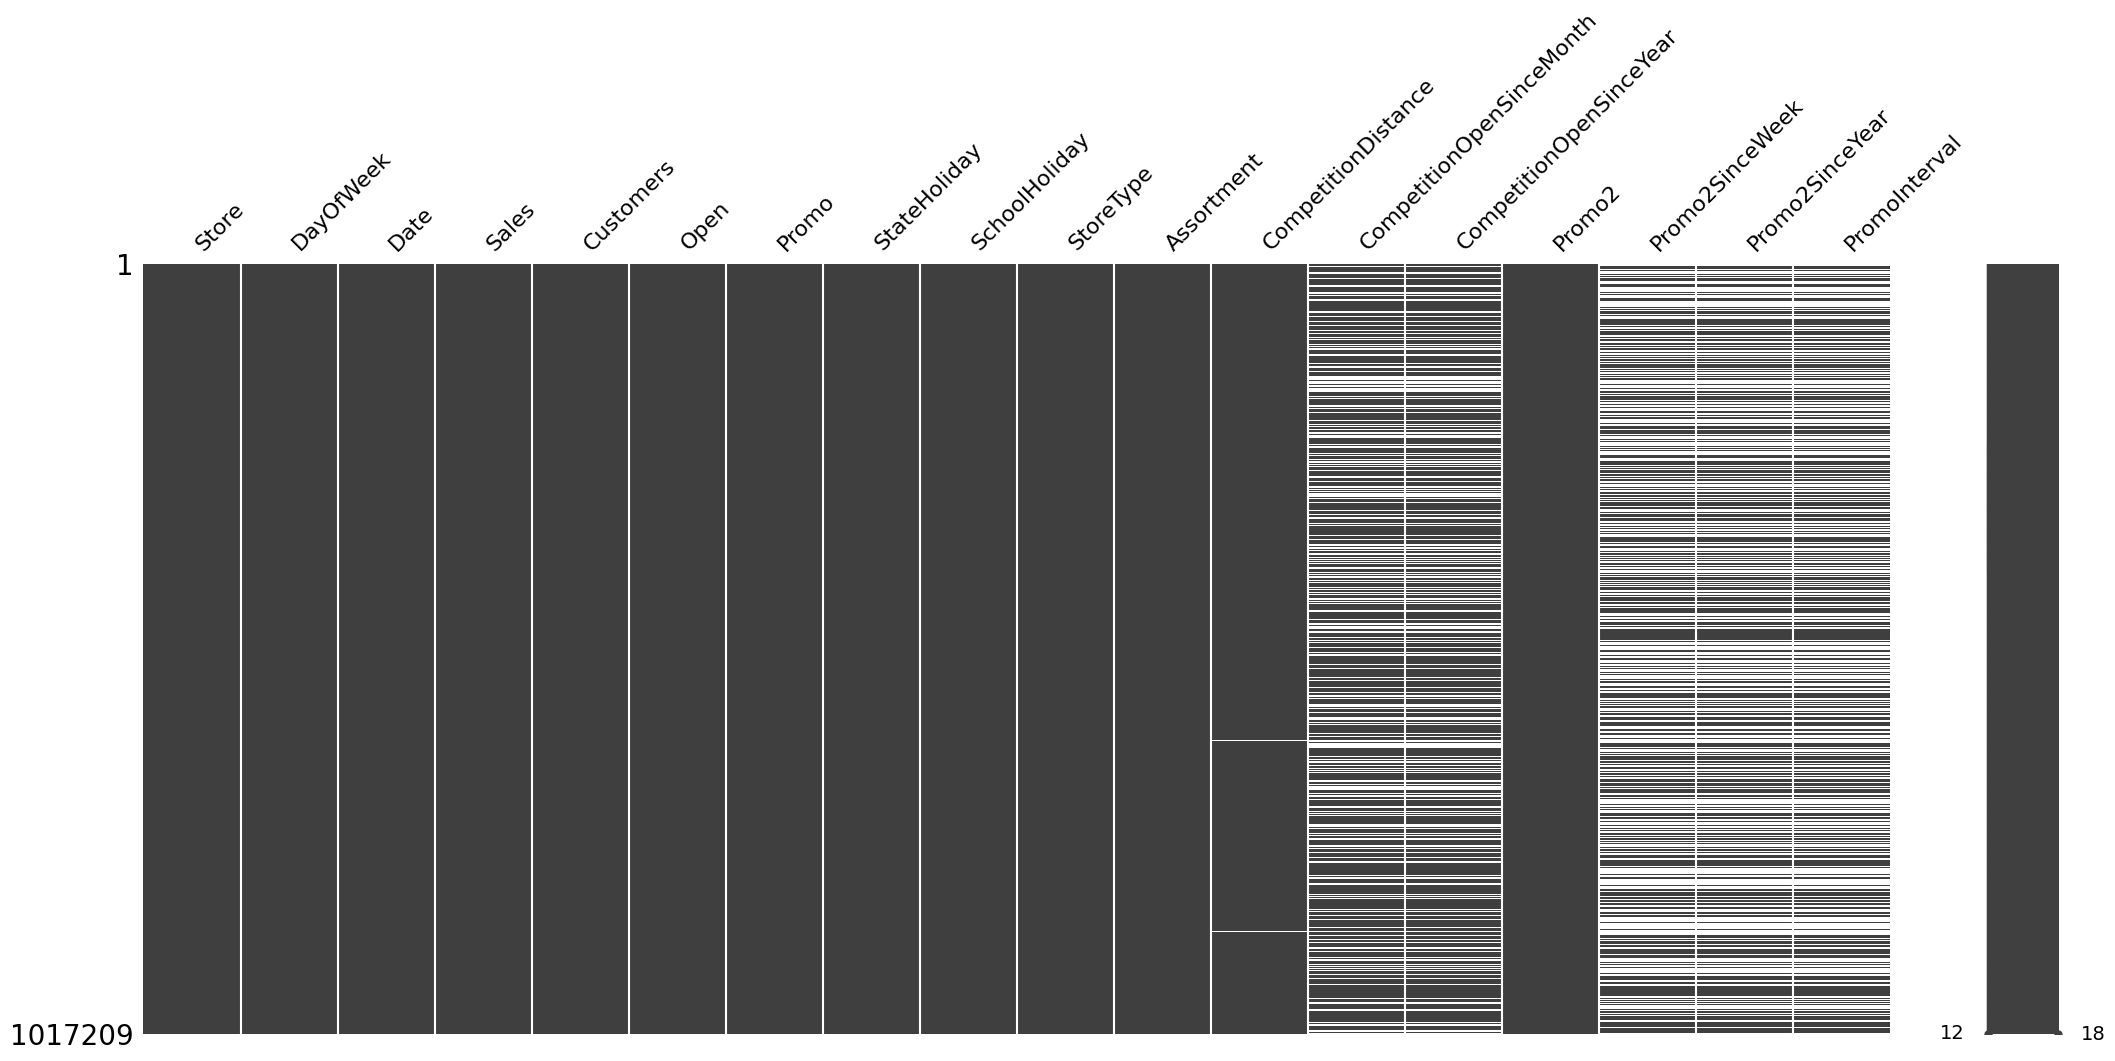

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [ ]:
print("Training data starts from: {}".format(train.Date.min()))
print("Training data end on: {}".format(train.Date.max()))
print()
print("Testing data starts from: {}".format(test.Date.min()))
print("Testing data end on: {}".format(test.Date.max()))

Training data starts from: 2013-01-01
Training data end on: 2015-07-31

Testing data starts from: 2015-08-01
Testing data end on: 2015-09-17


In [9]:
df.Date = pd.to_datetime(df.Date)
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

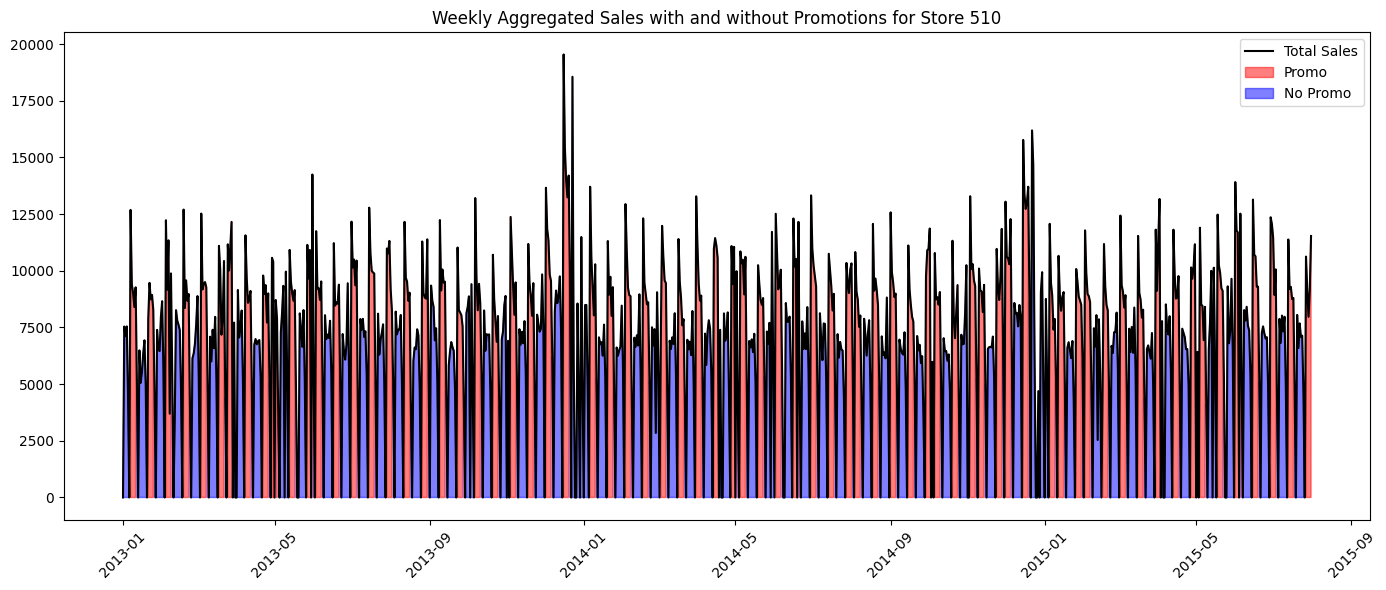

In [11]:
# est. 2m
data = df.copy()
data['Week'] = data['Date'].dt.to_period('W').apply(lambda r: r.start_time)
tmp = data[data['Store'] == 510] # set to a certain store
plt.figure(figsize=(14, 6))
plt.plot(tmp['Date'], tmp['Sales'], color='black', label='Total Sales')
plt.fill_between(tmp['Date'], tmp['Sales'], where=(tmp['Promo'] == 1), color='red', alpha=0.5, label='Promo')
plt.fill_between(tmp['Date'], tmp['Sales'], where=(tmp['Promo'] == 0), color='blue', alpha=0.5, label='No Promo')
plt.legend()
plt.xticks(rotation=45)
plt.title('Weekly Aggregated Sales with and without Promotions for Store 510')
plt.tight_layout()
plt.show()


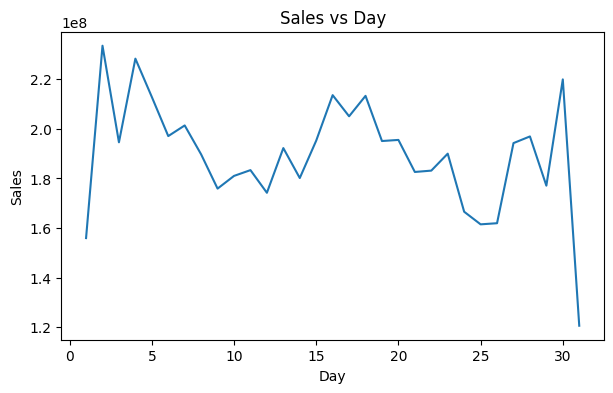

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df.groupby(df.Day)['Sales'].sum())
plt.title("Sales vs Day")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

Most Sales are done in the beginning of the month, the last day 31th is exceptionally low because not all month has 31th.

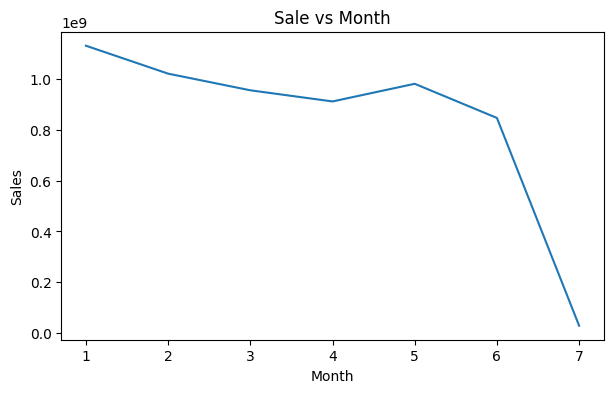

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df.groupby(df.DayOfWeek)['Sales'].sum())
plt.title("Sale vs Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Sales are more in the beginning of the week than the end.

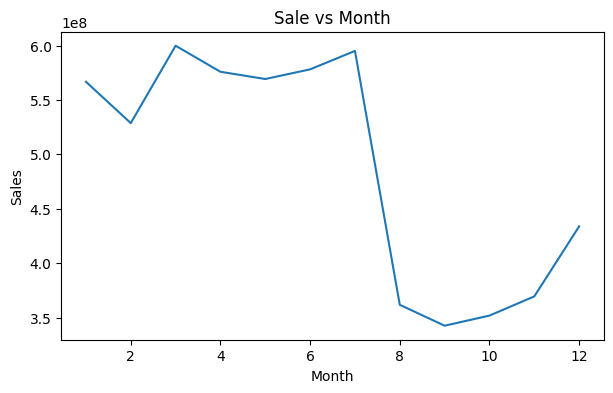

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df.groupby(df.Month)['Sales'].sum())
plt.title("Sale vs Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Aug-Dec has relatively lower sales

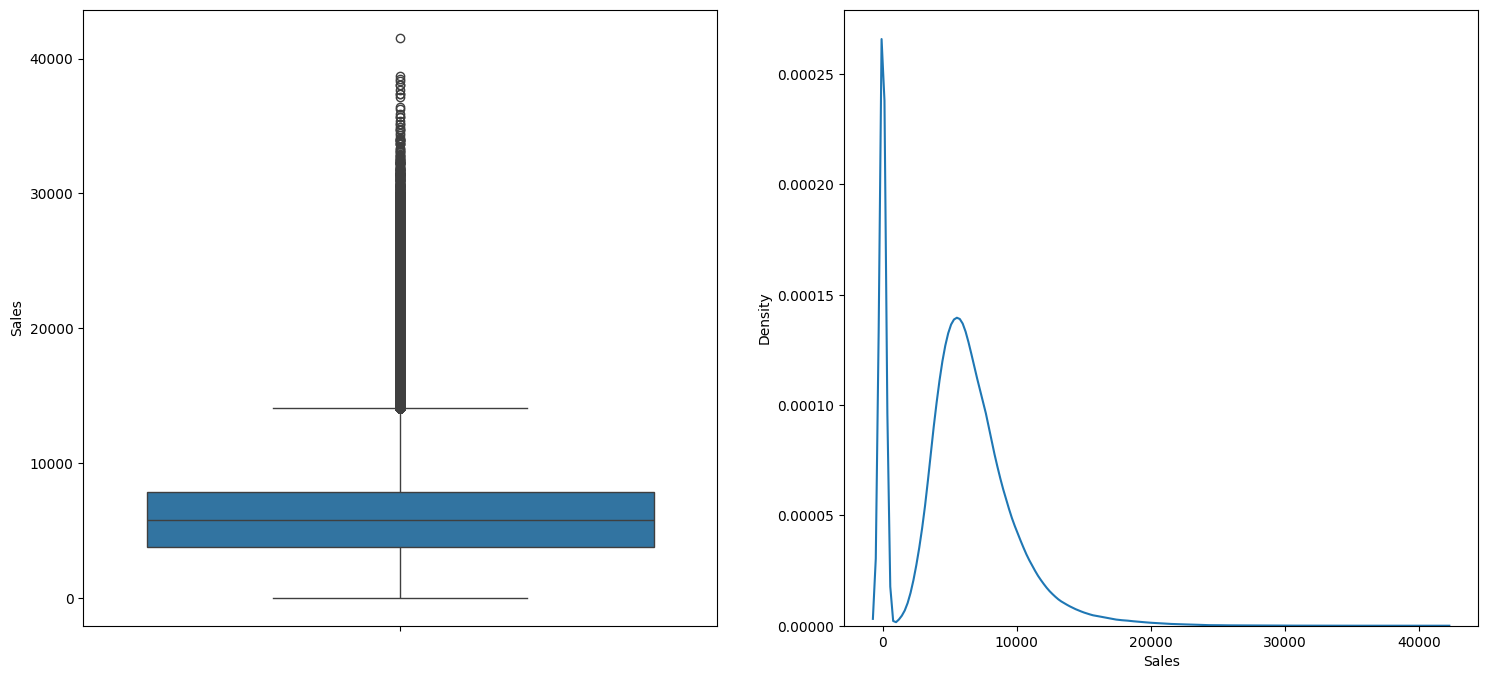

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
sns.boxplot(train.Sales, ax=ax1)
sns.kdeplot(train.Sales, ax=ax2)
plt.show()

Sales are 0 on a huge amount of days which could mean this is either imputed to fill gaps as it doesn't make sense for sale of a day to be 0. It could mean the store was closed, maybe there was a holiday.

In [ ]:
df[df.Open==0].Sales.value_counts()

,count
Sales,
0,172817


Seems like the assumption was correct. These values will later be filled with np.NaN as some models like XGBoost can handle missing values and might benefit from it.

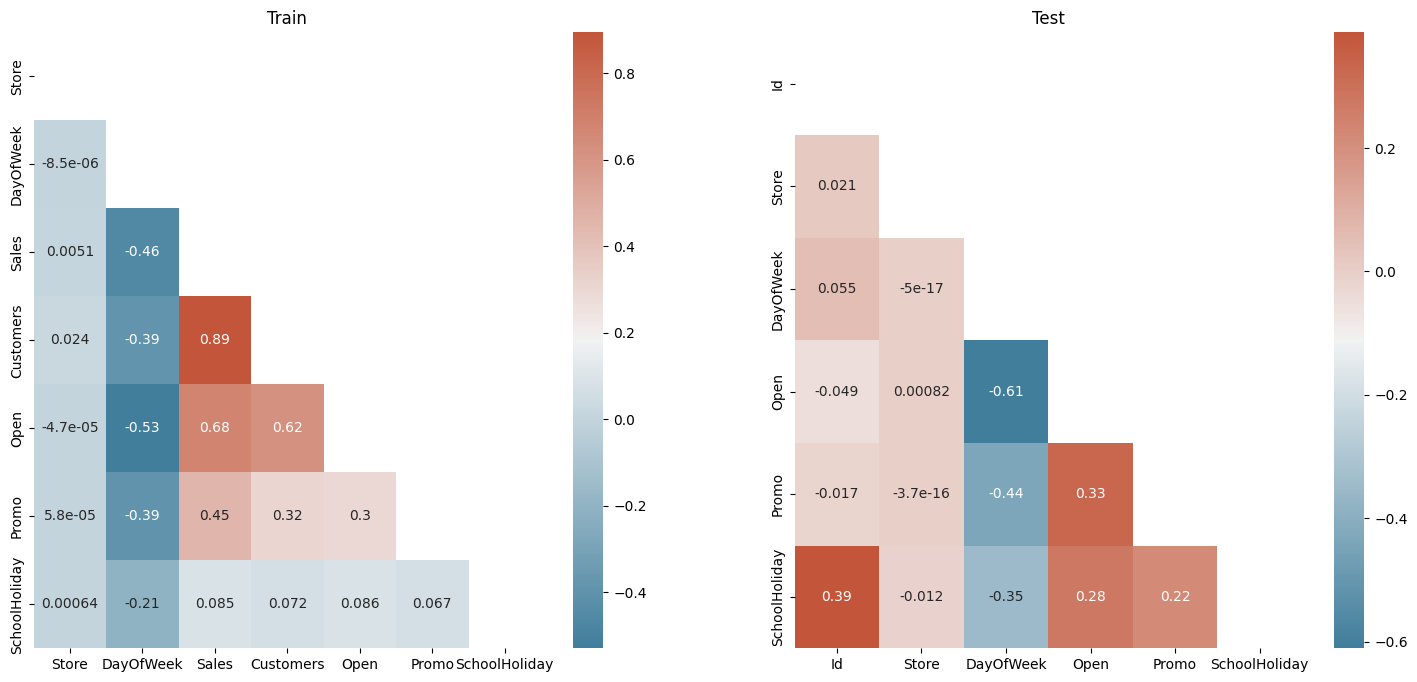

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = train.corr(numeric_only = True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(train.corr(numeric_only = True), mask=mask, cmap=cmap, annot=True, ax=ax1)
ax1.set_title('Train')
corr = test.corr(numeric_only = True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(test.corr(numeric_only = True), mask=mask, cmap=cmap, annot=True, ax=ax2)
ax2.set_title('Test')
plt.show()

Sales are highly correlated with feature Customers and feature Open and moderately correlated with Promo.

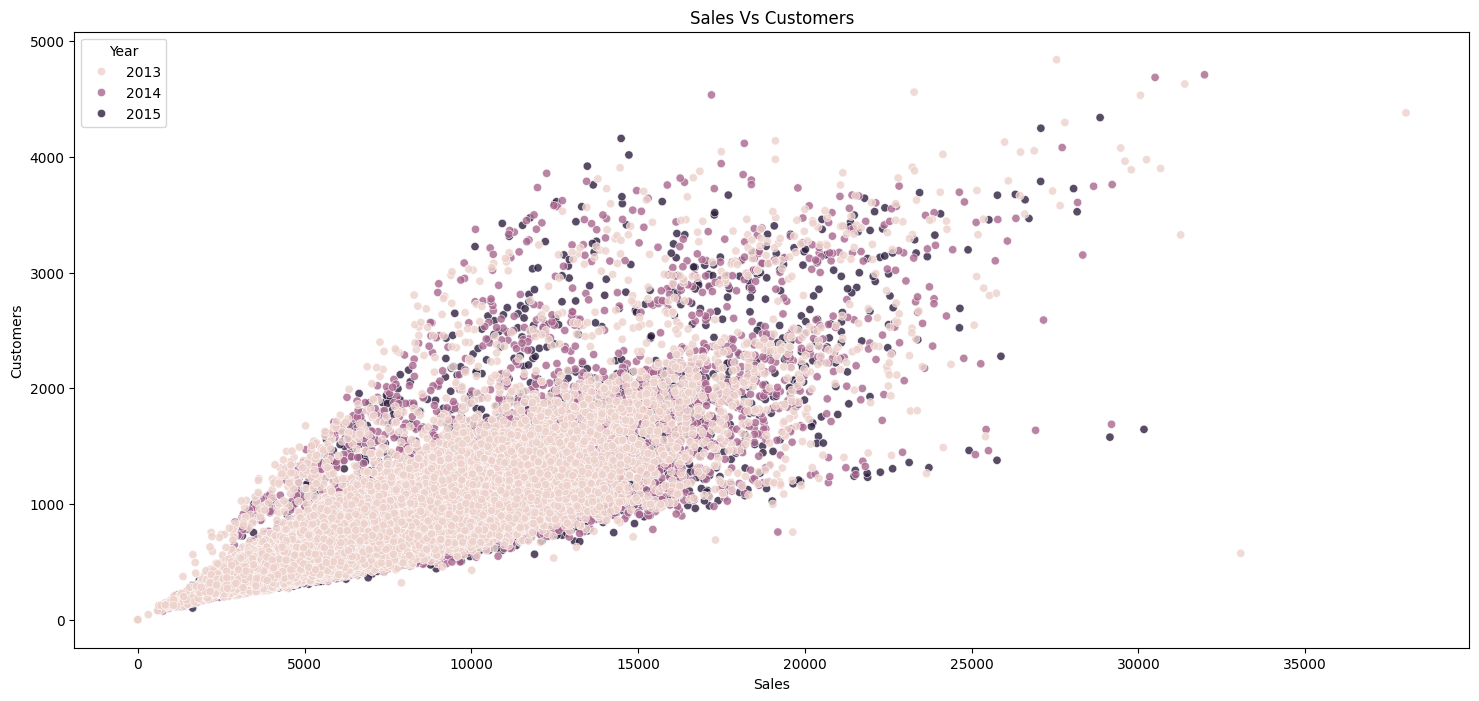

In [13]:
plt.figure(figsize=(18,8))
temp_df = df.sample(100000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue=df.Year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

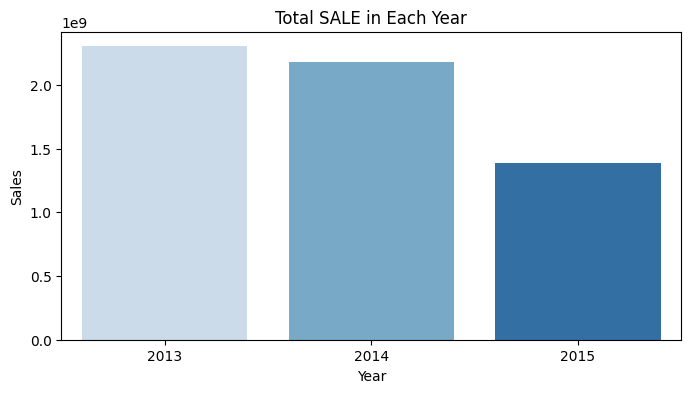

In [ ]:
plt.figure(figsize=(8,4))
temp_df = df.groupby(df.Year)['Sales'].sum()
sns.barplot(x=temp_df.index, y=list(temp_df), palette='Blues')
plt.title("Total SALE in Each Year")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

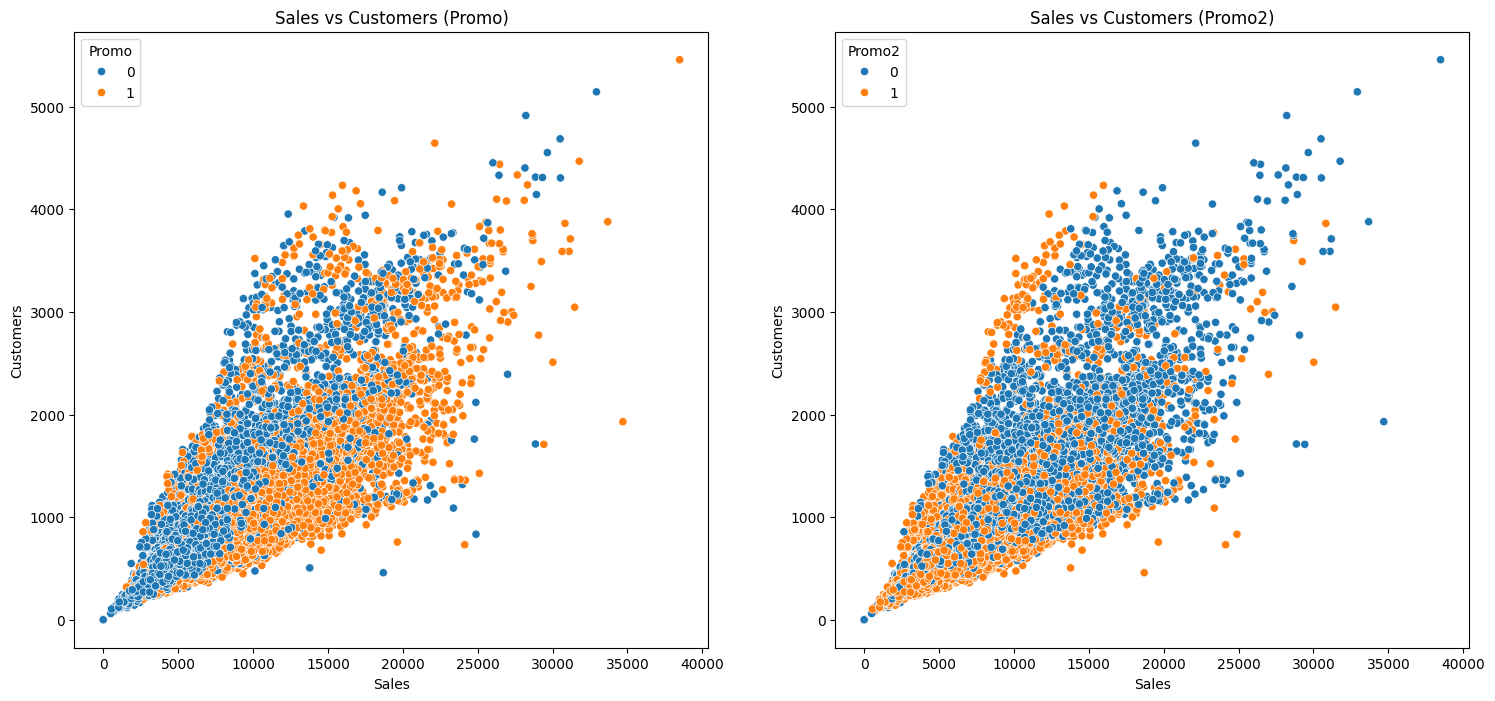

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
temp_df = df.sample(100000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=df.Promo, ax=ax1)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=df.Promo2, ax=ax2)
ax1.set_title('Sales vs Customers (Promo)')
ax2.set_title('Sales vs Customers (Promo2)')
plt.show()

Promo 1 is more successful than Promo 2

In [ ]:
df.groupby(df.Promo).Sales.mean()[1] > df.groupby(df.Promo2).Sales.mean()[1] #1 means store participated

True

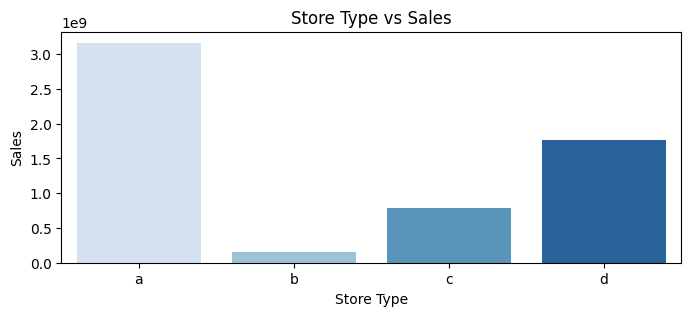

In [ ]:
plt.figure(figsize=(8,3))
temp_df = df.groupby(df.StoreType).sum(numeric_only=True)
sns.barplot(x=temp_df.index, y=temp_df.Sales, palette='Blues')
plt.title("Store Type vs Sales")
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

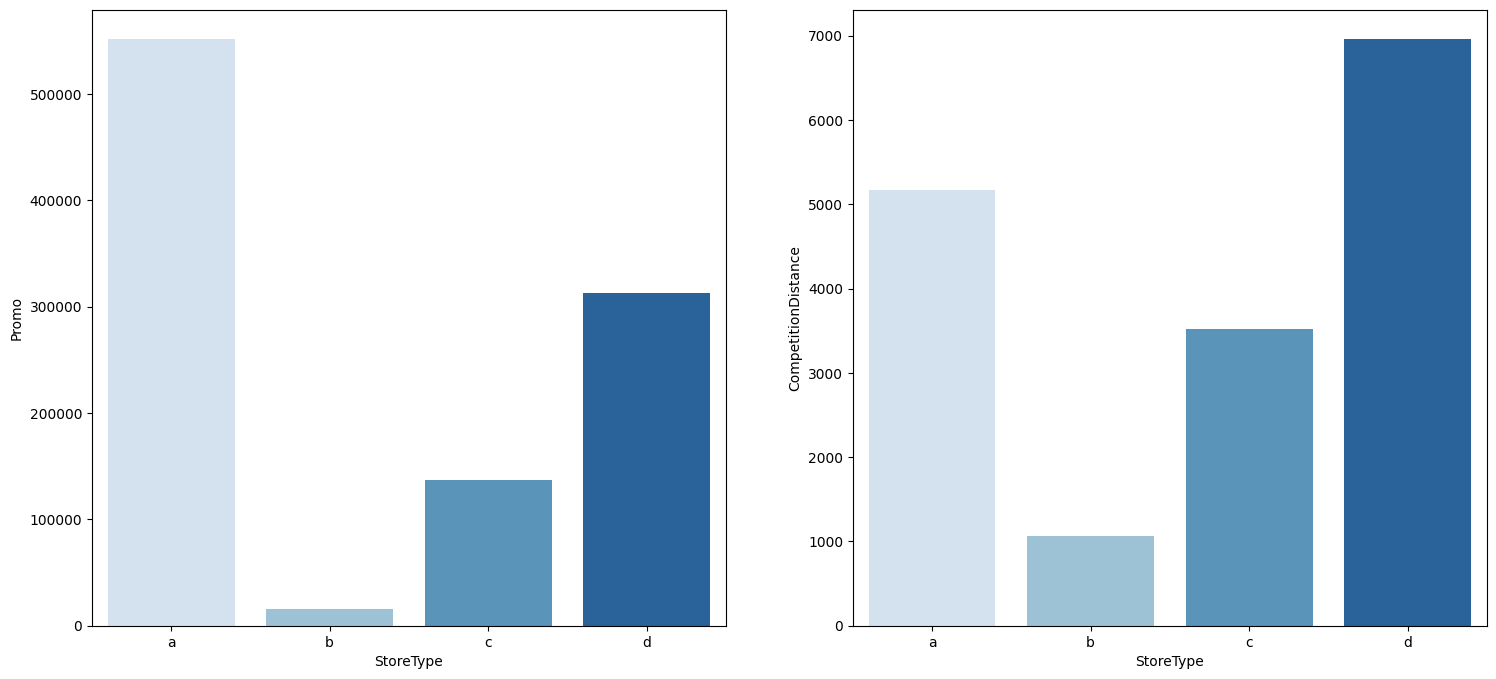

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
temp_df = df.groupby(df.StoreType).count()
sns.barplot(x=temp_df.index, y=temp_df['Promo'], ax=ax1, palette='Blues')
temp_df = df.groupby(df.StoreType).mean(numeric_only=True)
sns.barplot(x=temp_df.index, y=temp_df['CompetitionDistance'], ax=ax2, palette='Blues')
plt.show()

Store A did the most Promo'1's inspite of being on average top second in comparison to other stores with regard to Competition Distance (distance in meters to the nearest competitor store). Hence, I think it is fair to say promos are a big deal. Other factors could be seasonality, trend etc. Lets see about trend!

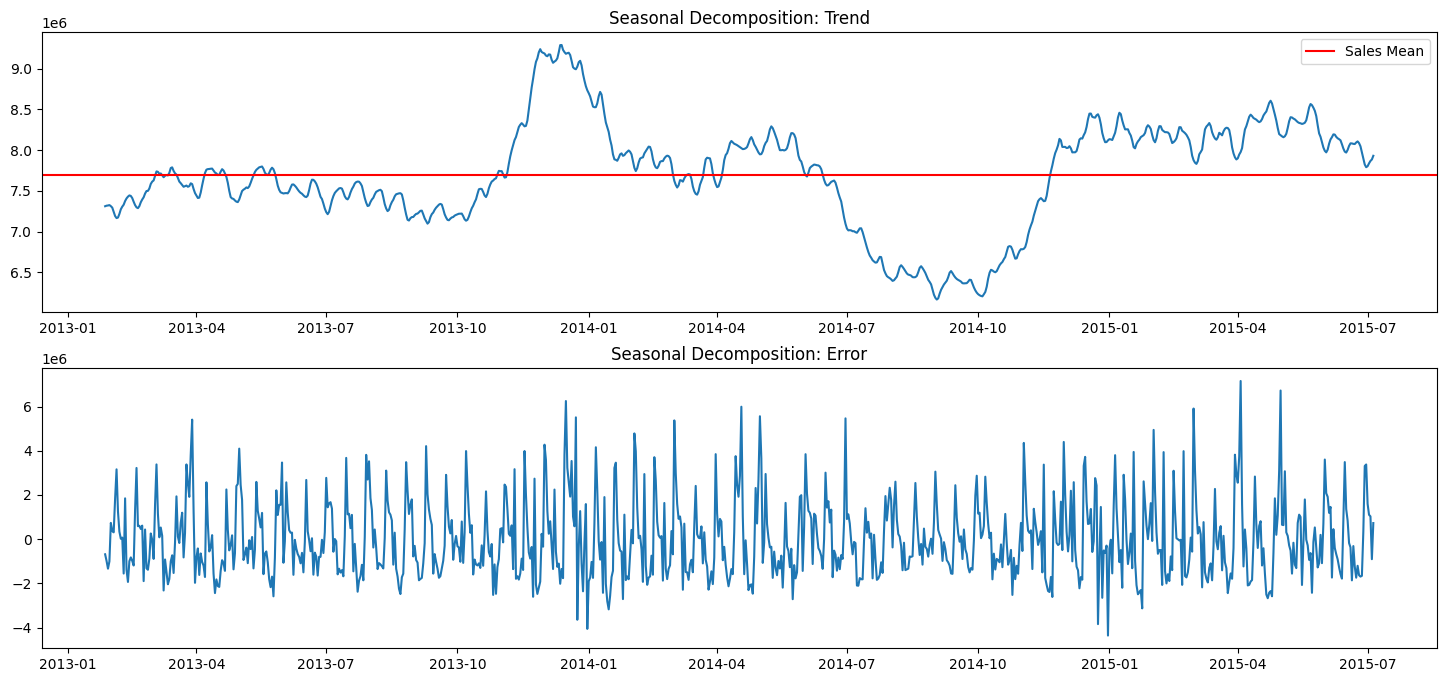

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
temp_df = train.copy()
temp_df.Date = pd.to_datetime(temp_df.Date)
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df[['Sales']]
temp_df = temp_df.groupby(temp_df.index).sum()
result = seasonal_decompose(temp_df, model='additive', period=52)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,8))
ax1.plot(result.trend)
ax1.axhline(y = temp_df.Sales.mean(), color = 'r', linestyle = '-', label='Sales Mean')
ax1.set_title("Seasonal Decomposition: Trend")
ax2.plot(result.resid)
ax2.set_title("Seasonal Decomposition: Error")
ax1.legend()
plt.show()

2015 has been a good year as the trend line is above the average line by the end of 2014. Beginning of 2014 is a huge peak, I wonder what drived that?

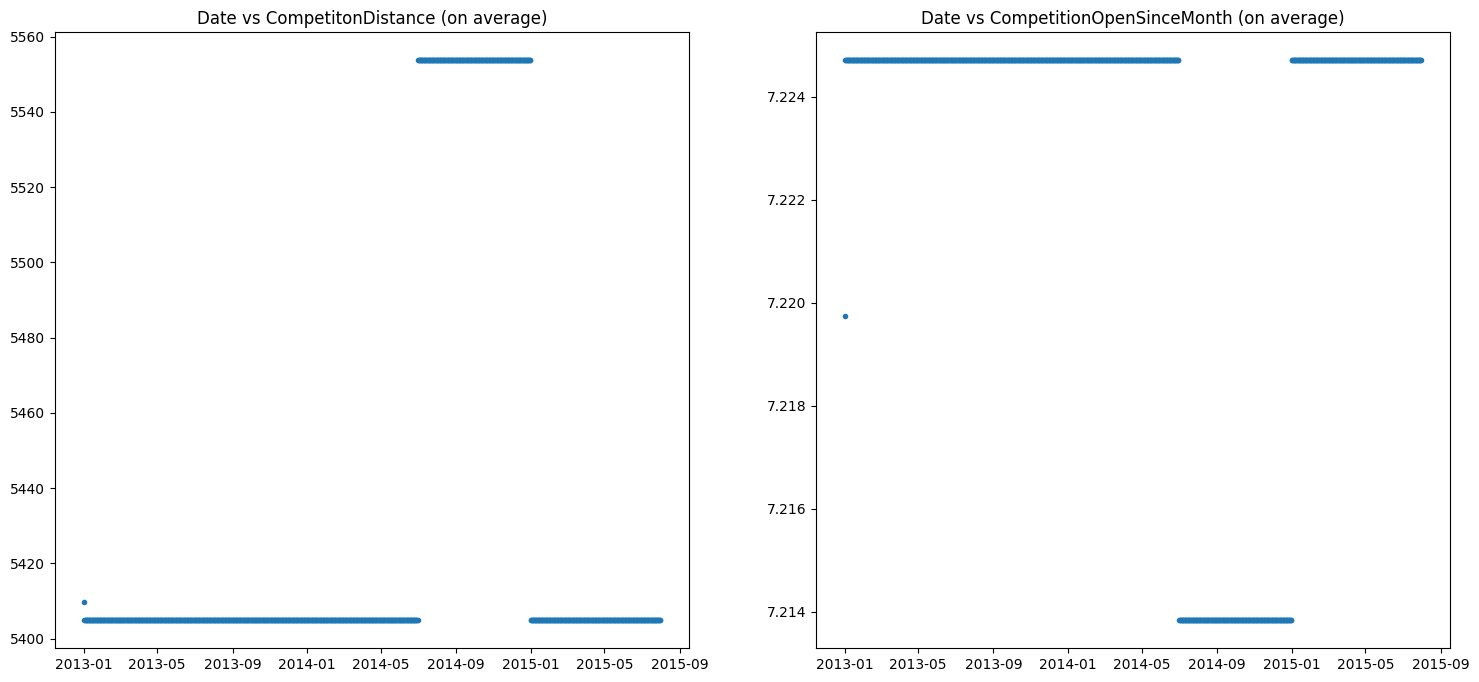

In [ ]:
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df.groupby(temp_df.index).mean(numeric_only=True)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax1.plot(temp_df.CompetitionDistance, '.')
ax1.set_title("Date vs CompetitonDistance (on average)")
ax2.plot(temp_df.CompetitionOpenSinceMonth, '.')
ax2.set_title("Date vs CompetitionOpenSinceMonth (on average)")
plt.show()

Seems like there was a new competitor near the end of 2014 and since the distance also relatively increased it could be maybe change of location but these are just assumptions. It could be useful for the model to interpret such behaviour in the future for the stores.

I wonder if the stores had done less promos when the trend was going down. Lets see!

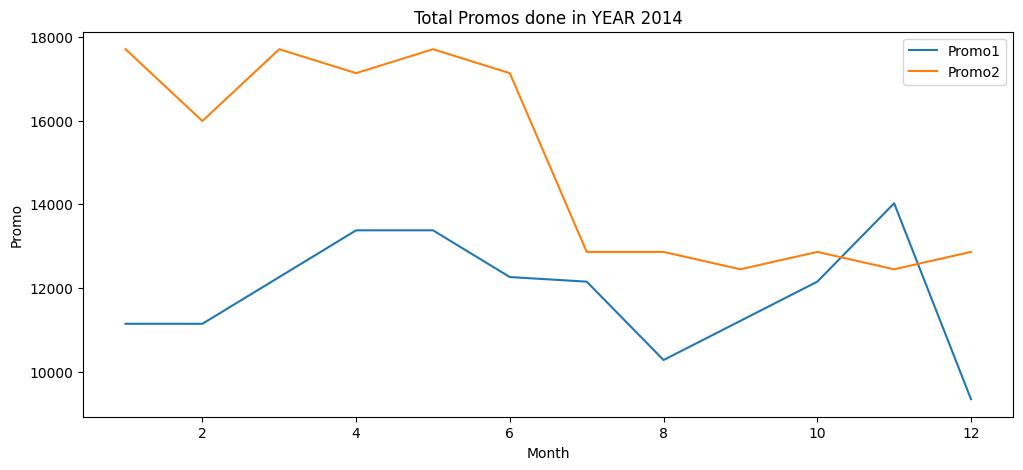

In [ ]:
plt.figure(figsize=(12,5))
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df = temp_df[temp_df.Year==2014]
temp_df = temp_df.groupby(temp_df.Month).sum(numeric_only=True)
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')

plt.title('Total Promos done in YEAR 2014')
sns.lineplot(x=temp_df.index, y=temp_df.Promo, palette='Blues', label='Promo1')
sns.lineplot(x=temp_df.index, y=temp_df.Promo2, palette='Blues', label='Promo2')
plt.legend()
plt.show()

## Feature Engineering and Preprocessing

In [ ]:
features_x = ['Store', 'Date', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday']
features_y = ['SalesLog']
train['is_train'] = 1
test['is_train'] = 0
df = pd.concat([train, test])

In [ ]:
df.Date = pd.to_datetime(df.Date) # Converting date to required format
df = df.loc[~((df['Open'] == 1) & (df['Sales'] == 0))] # Removing rows with Sales 0

df.StateHoliday = df.StateHoliday.map({0:'0', 'a':'a', 'b':'b', 'c':'c', '0':'0'}) # mixed data types
df.StateHoliday = LabelEncoder().fit_transform(df.StateHoliday) # Encoding for XG Boost

In [ ]:
var_name = 'Date'

df[var_name + 'Day'] = df[var_name].dt.day # adding day
df[var_name + 'Month'] = df[var_name].dt.month #adding month
df[var_name + 'Year'] = df[var_name].dt.year #adding year
df[var_name + 'DayOfYear'] = df[var_name].dt.dayofyear #adding dayofyear

features_x.remove(var_name) #removing Date
features_x.append(var_name + 'Day')
features_x.append(var_name + 'Month')
features_x.append(var_name + 'Year')
features_x.append(var_name + 'DayOfYear')

In [ ]:
store.StoreType = LabelEncoder().fit_transform(store.StoreType) #encoding StoreType
store.Assortment = LabelEncoder().fit_transform(store.Assortment) #encoding Assortment

In [ ]:
competition_open = []
for index, value in store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].iterrows():
    try:
        year, month = int(value['CompetitionOpenSinceYear']), int(value['CompetitionOpenSinceMonth'])
        date = pd.to_datetime("{}-{}".format(year, month), format='%Y-%m')
        competition_open.append(date)
    except:
        competition_open.append(np.nan)
competition_open = pd.Series(competition_open)
competition_open.shape

(1115,)

In [ ]:
store['CompetitionOpen'] = competition_open #converted int to datetime
store['CompetitionOpen'] = store.CompetitionOpen.dt.strftime('%Y%m%d')

In [ ]:
promo = []
for index, value in store[['Promo2SinceWeek', 'Promo2SinceYear']].iterrows():
    try:
        year, week = int(value['Promo2SinceYear']), int(value['Promo2SinceWeek'])
        date = pd.to_datetime("{}-{}-01".format(year, week), format='%Y%W')
        promo.append(date)
    except:
        promo.append(np.nan)
promo = pd.to_datetime(pd.Series(competition_open))
promo.shape

(1115,)

In [ ]:
store['PromoSince'] = promo # converted int to datetime
store['PromoSince'] = store.PromoSince.dt.strftime('%Y%m%d')

In [ ]:
store_features = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
                  'PromoSince', '0_PromoInterval']
#1_PromoInterval, 2_PromoInterval, 3_PromoInterval irrelevent

In [ ]:
df = pd.merge(df, store[store_features], how='left', on=['Store'])

In [ ]:
features_x = list(set(features_x + store_features))
for feature in features_x:
    df[feature] = df[feature].fillna(-999) # out of range value for model

In [ ]:
df['DateInt'] = df.Date.dt.strftime('%Y%m%d').map(int) # mapping to Int
df['CompetitionOpen'] = df.CompetitionOpen.map(int)
df['PromoSince'] = df.PromoSince.map(int)

In [ ]:
df['Zscore'] = (df.Sales - df.Sales.mean())/df.Sales.std()

In [ ]:
thresh=4.0
def check_outlier(value):
    if(value>=thresh):
        return True
    else:
        return False

df['Outlier'] = df.Zscore.apply(check_outlier)

In [ ]:
store_data_sales = df.groupby([df['Store']])['Sales'].sum()
store_data_customers = df.groupby([df['Store']])['Customers'].sum()
store_data_open = df.groupby([df['Store']])['Open'].count()

store_data_sales_per_day = store_data_sales / store_data_open
store_data_customers_per_day = store_data_customers / store_data_open
store_data_sales_per_customer_per_day = store_data_sales_per_day / store_data_customers_per_day

df_store = pd.merge(store, store_data_sales_per_day.reset_index(name='SalesPerDay'), how='left', on=['Store'])
df_store = pd.merge(df_store, store_data_customers_per_day.reset_index(name='CustomersPerDay'), how='left', on=['Store'])
df_store = pd.merge(df_store, store_data_sales_per_customer_per_day.reset_index(name='SalesPerCustomersPerDay'), how='left', on=['Store'])

In [ ]:
store_features = ['Store', 'SalesPerDay', 'CustomersPerDay', 'SalesPerCustomersPerDay']

features_x = list(set(features_x + store_features))
df = pd.merge(df, df_store[store_features], how='left', on=['Store'])

In [ ]:
holidays_each_day_of_week = df.groupby(df.DayOfWeek).sum(numeric_only=True).StateHoliday
df = pd.merge(df, holidays_each_day_of_week.reset_index(name='HolidaysPerDayOfWeek'), on=['DayOfWeek'])

school_holidays_each_day_of_week = df.groupby(df.DayOfWeek).sum(numeric_only=True).SchoolHoliday
df = pd.merge(df, school_holidays_each_day_of_week.reset_index(name='SchoolHolidaysPerDayOfWeek'), on=['DayOfWeek'])

promo_each_day_of_week = df.groupby(df.DayOfWeek).sum(numeric_only=True).Promo
df = pd.merge(df, promo_each_day_of_week.reset_index(name='PromoPerDayOfWeek'), on=['DayOfWeek'])

In [ ]:
holidays_next_week=[]
holidays_next_week_index=[]
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index + datetime.timedelta(days=7)
    end_range = index + datetime.timedelta(days=15)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum(numeric_only=True)[start_range:end_range]).StateHoliday)
    holidays_next_week.append(school_holidays+state_holidays)
    holidays_next_week_index.append(index)

holidays_next_week = pd.Series(holidays_next_week)
holidays_next_week.shape

(990,)

In [ ]:
holidays_this_week=[]
index_list = []
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index
    end_range = index + datetime.timedelta(days=7)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_this_week.append(school_holidays+state_holidays)
    index_list.append(index)

holidays_this_week = pd.Series(holidays_this_week)
holidays_this_week.shape

(990,)

In [ ]:
holidays_last_week=[]
holidays_last_week_index=[]
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index - datetime.timedelta(days=7)
    end_range = index + datetime.timedelta(days=1)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_last_week.append(school_holidays+state_holidays)
    holidays_last_week_index.append(index)

holidays_last_week = pd.Series(holidays_next_week)
holidays_last_week.shape

(990,)

In [ ]:
temp_df = pd.DataFrame({'HolidaysNextWeek':holidays_next_week, 'Date': holidays_next_week_index})
df = pd.merge(df, temp_df, on=['Date'])

temp_df = pd.DataFrame({'HolidaysThisWeek':holidays_this_week, 'Date': index_list})
df = pd.merge(df, temp_df, on=['Date'])

temp_df = pd.DataFrame({'HolidaysLastWeek':holidays_last_week, 'Date': holidays_last_week_index})
df = pd.merge(df, temp_df, on=['Date'])

holidays_features = ['HolidaysPerDayOfWeek', 'SchoolHolidaysPerDayOfWeek', 'PromoPerDayOfWeek',
                     'HolidaysNextWeek', 'HolidaysThisWeek', 'HolidaysLastWeek']

features_x = list(set(features_x + holidays_features))

In [ ]:
#Most Promos are done on DayofWeek 4
df['DaysTillMaxPromo'] = df.DayOfWeek.apply(lambda x: 4-x)

In [ ]:
df['PromoTomorrow'] = df.Promo.shift(-1)
df['PromoYesterday'] = df.Promo.shift(1)

In [ ]:
promo_features = ['DaysTillMaxPromo', 'PromoTomorrow', 'PromoYesterday']

features_x = list(set(features_x + promo_features))

In [ ]:
df.Sales = df.Sales.apply(lambda x: np.nan if x == 0 else x) # Convert 0 to NaNs

# Transforming Sales to 1+log
df.loc[df['is_train'] == 1, 'SalesLog'] = np.log(1+df.loc[df['is_train'] == 1]['Sales'])

In [ ]:
print(len(features_x))
print(df.shape)
print(df.isnull().sum().sum())

28
(1058243, 37)
1527143


In [ ]:
data = df.loc[(df['is_train'] == 1) & (df['Open'] == 1) & (df['Outlier'] == False)]
x_train, x_test, y_train, y_test = train_test_split(data[features_x],
                                                    data[features_y],
                                                    test_size=0.1,
                                                    random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(757442, 28) (757442, 1) (84161, 28) (84161, 1)


## Modeling

In [ ]:
import xgboost as xgb

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [ ]:
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

num_round = 20000
evallist = [(dtrain, 'train'), (dtest, 'test')]

param = {'max_depth': 9,
         'eta': 0.01,
         'subsample': 0.75,
         'colsample_bytree': 0.6,
         'objective': 'reg:squarederror',}

plst = list(param.items())

model = xgb.train(plst, dtrain, num_round, evallist,
                  feval=rmspe_xg, verbose_eval=250, early_stopping_rounds=250)

[0]	train-rmse:0.41569	train-rmspe:0.55275	test-rmse:0.41592	test-rmspe:0.52201
[250]	train-rmse:0.15506	train-rmspe:0.22875	test-rmse:0.15529	test-rmspe:0.17494
[500]	train-rmse:0.12873	train-rmspe:0.19559	test-rmse:0.12998	test-rmspe:0.14462
[750]	train-rmse:0.11850	train-rmspe:0.17714	test-rmse:0.12058	test-rmspe:0.13334
[1000]	train-rmse:0.11211	train-rmspe:0.16284	test-rmse:0.11484	test-rmspe:0.12671
[1250]	train-rmse:0.10767	train-rmspe:0.15529	test-rmse:0.11097	test-rmspe:0.12241
[1500]	train-rmse:0.10413	train-rmspe:0.14877	test-rmse:0.10795	test-rmspe:0.11911
[1750]	train-rmse:0.10114	train-rmspe:0.14431	test-rmse:0.10547	test-rmspe:0.11640
[2000]	train-rmse:0.09867	train-rmspe:0.13824	test-rmse:0.10349	test-rmspe:0.11425
[2250]	train-rmse:0.09644	train-rmspe:0.13311	test-rmse:0.10175	test-rmspe:0.11239
[2500]	train-rmse:0.09439	train-rmspe:0.12702	test-rmse:0.10018	test-rmspe:0.11071
[2750]	train-rmse:0.09263	train-rmspe:0.12265	test-rmse:0.09890	test-rmspe:0.10934
[3000]	tra

<Figure size 1800x800 with 0 Axes>

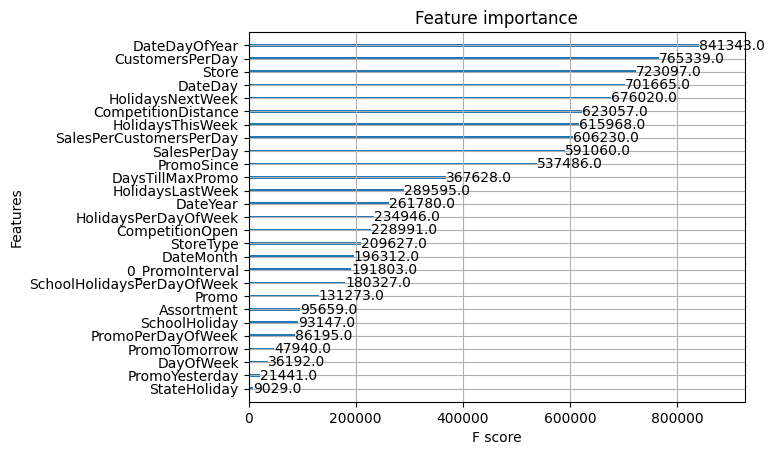

In [ ]:
#Print Feature Importance
plt.figure(figsize=(18,8))
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
submit = df.loc[df['is_train'] == 0]
dsubmit = xgb.DMatrix(submit[features_x])
predictions = model.predict(dsubmit)

df_predictions = submit['Id'].reset_index()
df_predictions['Id'] = df_predictions['Id'].astype('int')
df_predictions['Sales'] = (np.exp(predictions) - 1) * 0.985 # Scale Back

df_predictions.sort_values('Id', inplace=True)
# df_predictions[['Id', 'Sales']].to_csv('solution.csv', index=False)